# Weighted Interval Scheduling on Medical Appointment Dataset and Cloud Workload Dataset

In [6]:
# Import files and libraries
from pathlib import Path
import sys
import os
sys.path.append(str(Path.cwd().parent))
import pandas as pd
import python.weighed_interval_scheduling as wis
import python.charts as chart
import time
import matplotlib.pyplot as plt

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
medical_path = "../data/processed-datasets/medical-appointment-scheduling-system/medical-appointments-"
cloud_path = "../data/processed-datasets/cloud-workload-job-traces/cloud-workload-"

## Medical Appointment Dataset

In [7]:
# Import medical data
dfs = {}
for day in days:
    filepath = medical_path + day + ".csv"
    if Path(filepath).exists():
        df = pd.read_csv(filepath)
        dfs[day] = df

In [8]:
# Data frame columns
interval_col = 'appointment_id'
start_time_col = 'start_time'
end_time_col = 'end_time'
start_min_col = 'start_minutes'
end_min_col = 'end_minutes'
width_col = "Duration"
priority_col = 'priority'

Monday Schedule:
Maximum Profit: 2256
Selected Jobs: [260, 102, 112, 182, 543, 358, 332, 327, 308, 29, 174, 335, 533, 481, 297, 539, 403, 521, 263, 210, 85, 95, 524, 8, 290, 365, 9, 467, 119, 391, 167, 461, 117, 74, 349, 284, 96, 316, 287]
Number of jobs selected: 39
Number of jobs not selected: 28
Runtime: 0.0964999999837346 milliseconds

Tuesday Schedule:
Maximum Profit: 2210
Selected Jobs: [171, 606, 337, 599, 215, 285, 602, 257, 591, 574, 43, 350, 353, 580, 28, 384, 375, 507, 469, 595, 10, 291, 326, 238, 608, 268, 370, 604, 5, 219, 113, 160, 281, 184, 486, 587, 576, 485, 456, 527]
Number of jobs selected: 40
Number of jobs not selected: 25
Runtime: 0.08712499999319334 milliseconds

Wednesday Schedule:
Maximum Profit: 2647
Selected Jobs: [118, 544, 301, 540, 279, 530, 120, 635, 578, 357, 137, 234, 69, 62, 24, 639, 12, 372, 412, 64, 300, 614, 409, 105, 423, 562, 98, 607, 134, 231, 255, 320, 504, 522, 132, 209, 378, 60, 61, 373, 305, 27, 200]
Number of jobs selected: 43
Number of jobs

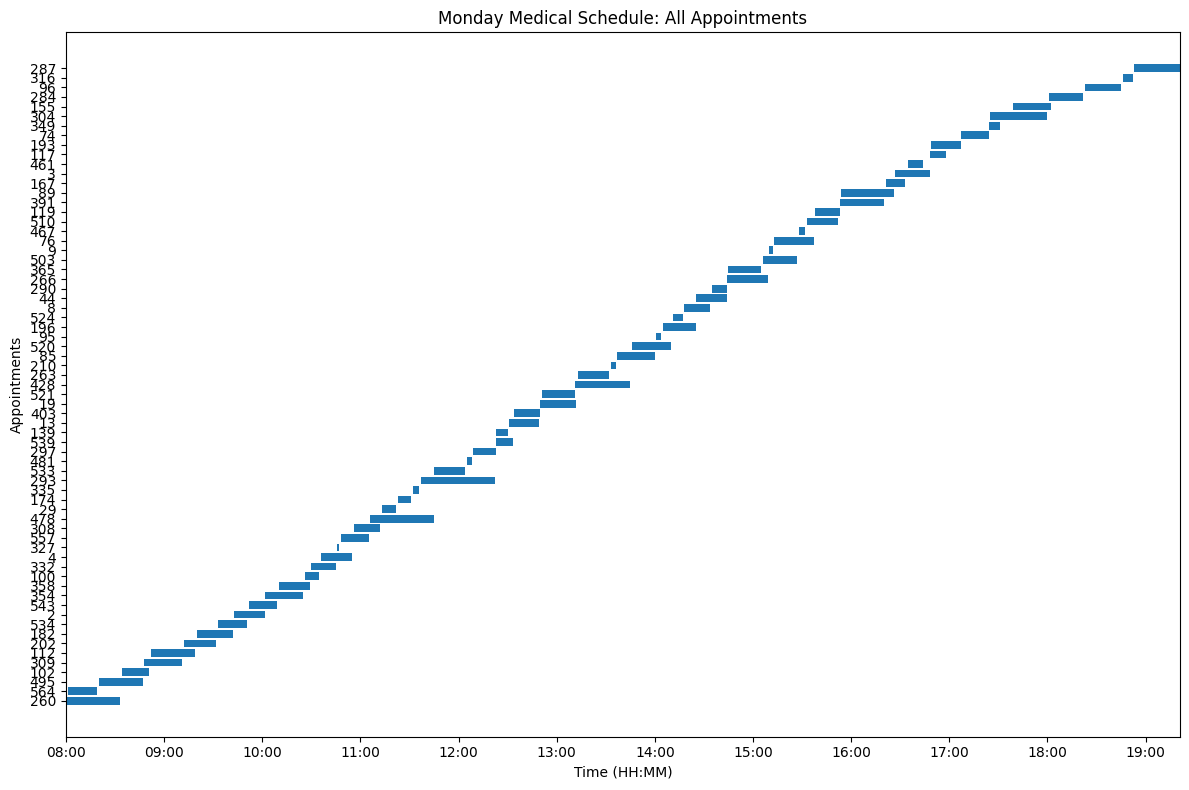

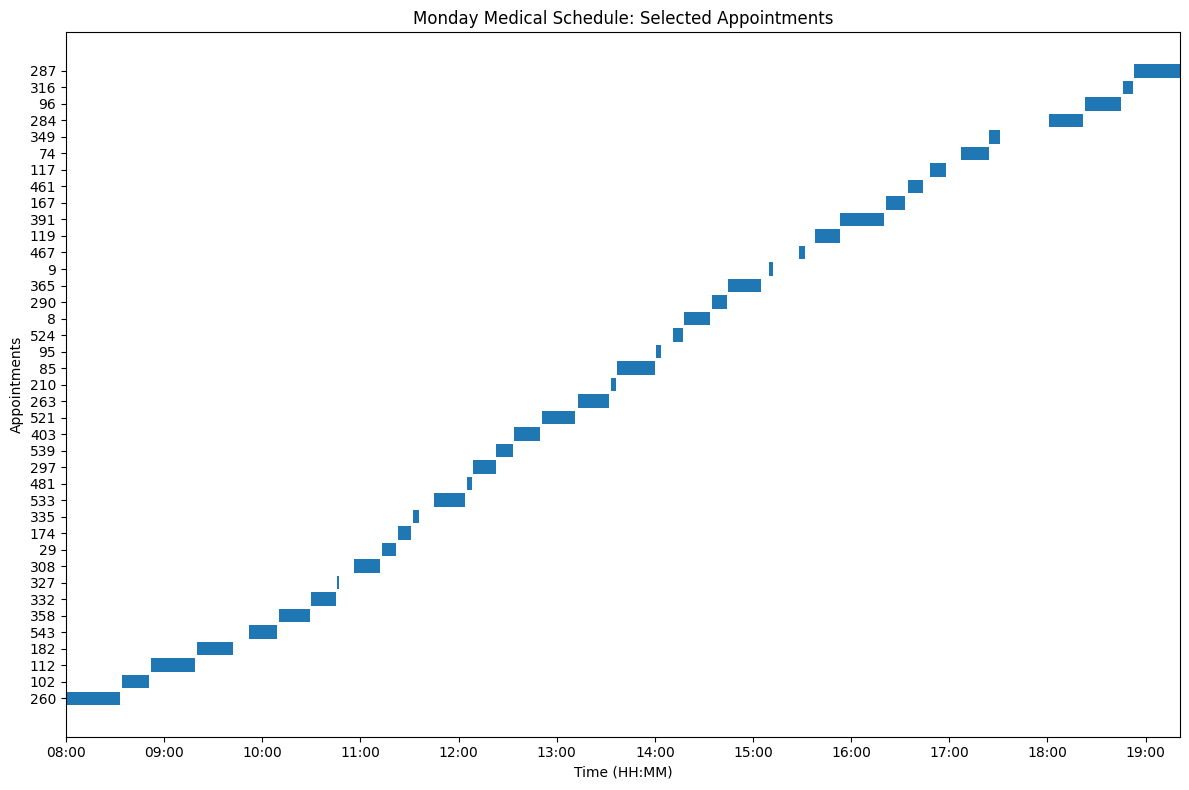

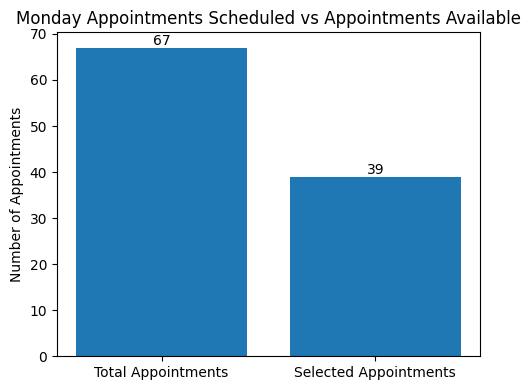

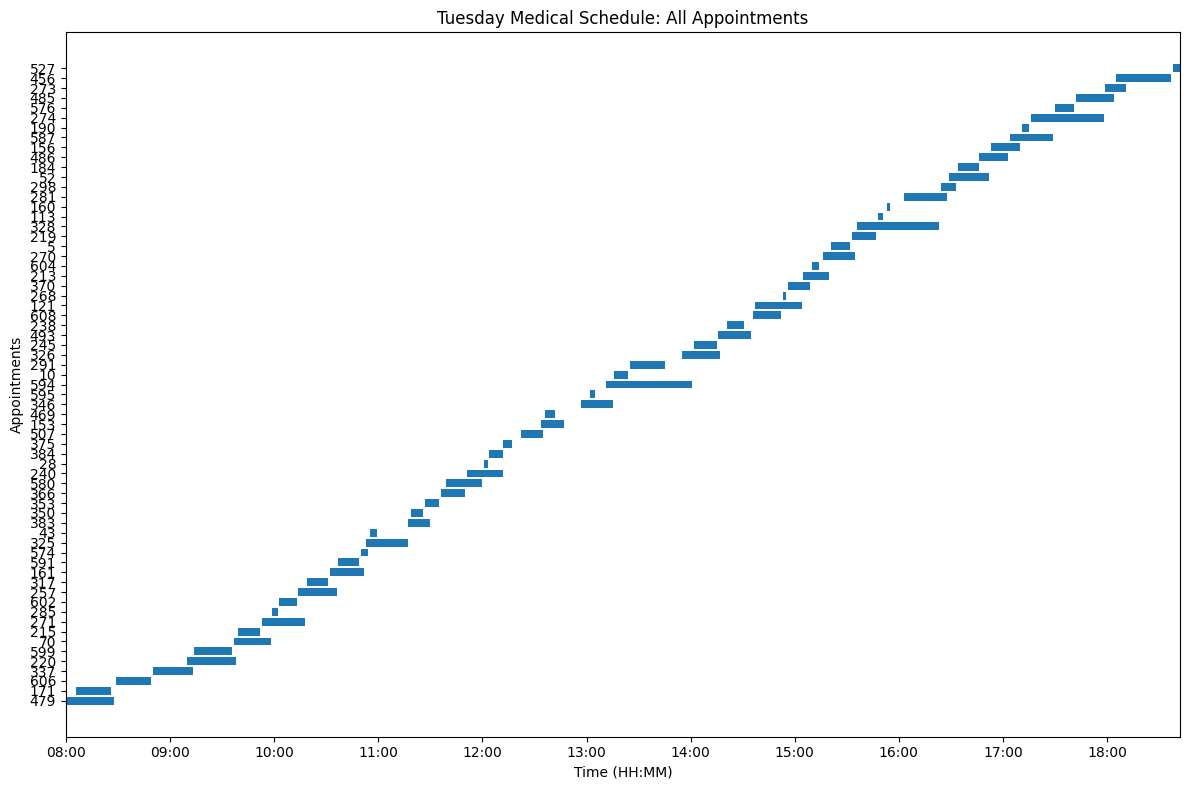

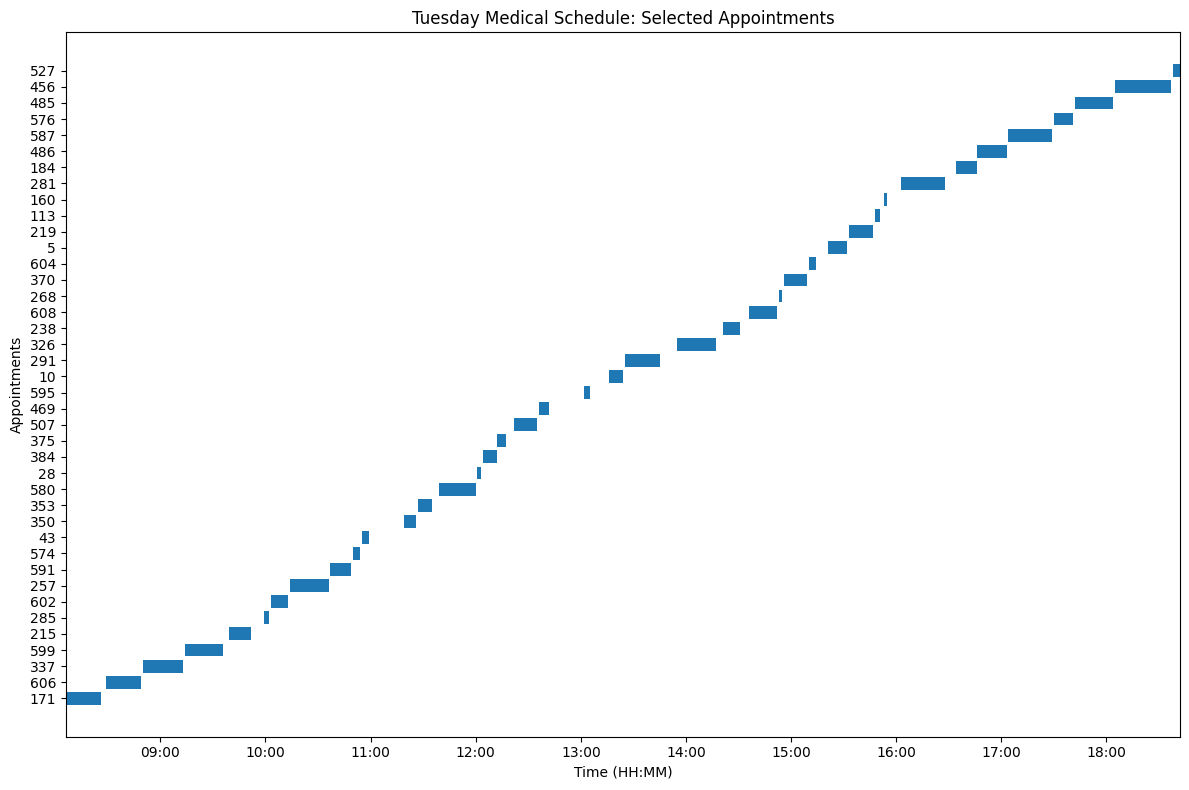

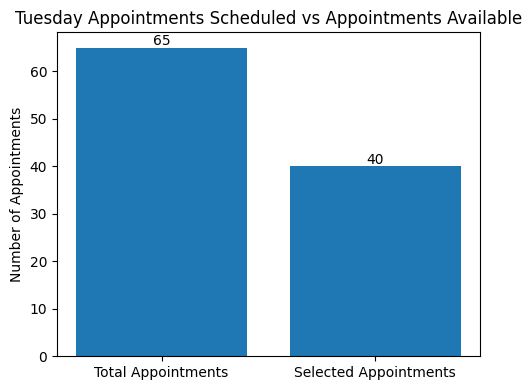

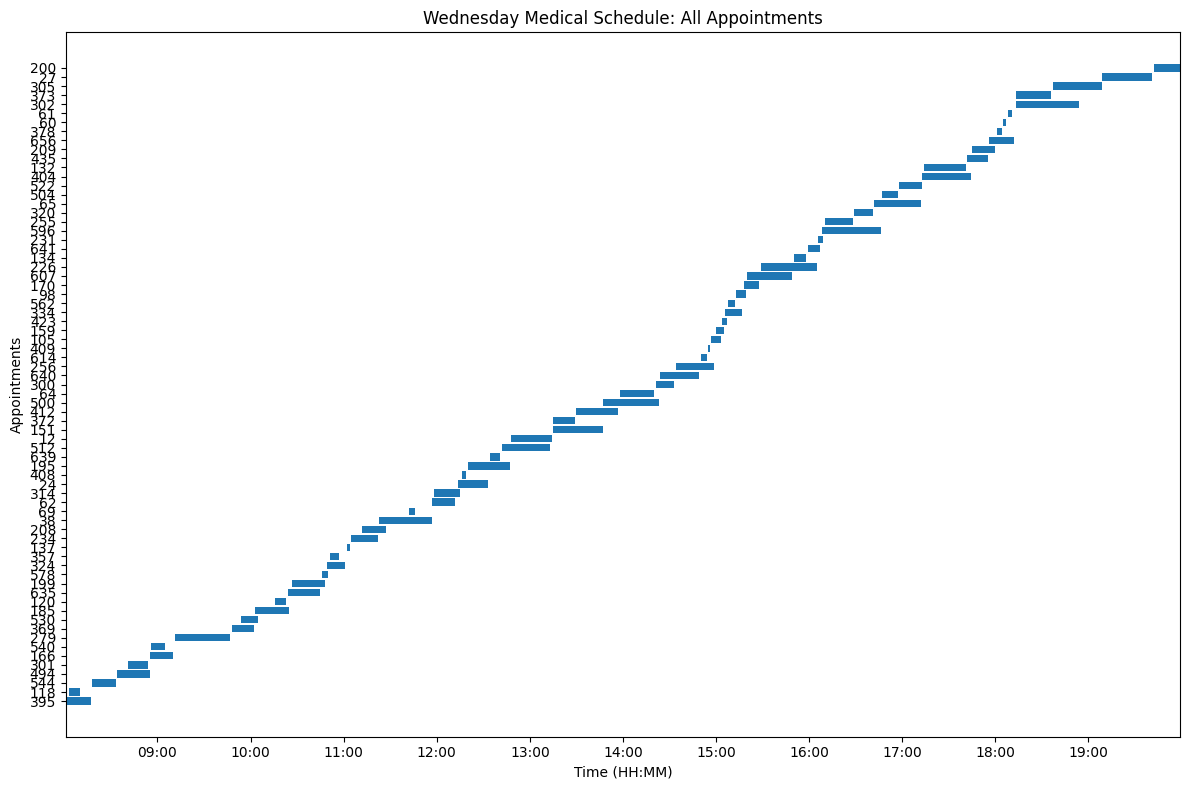

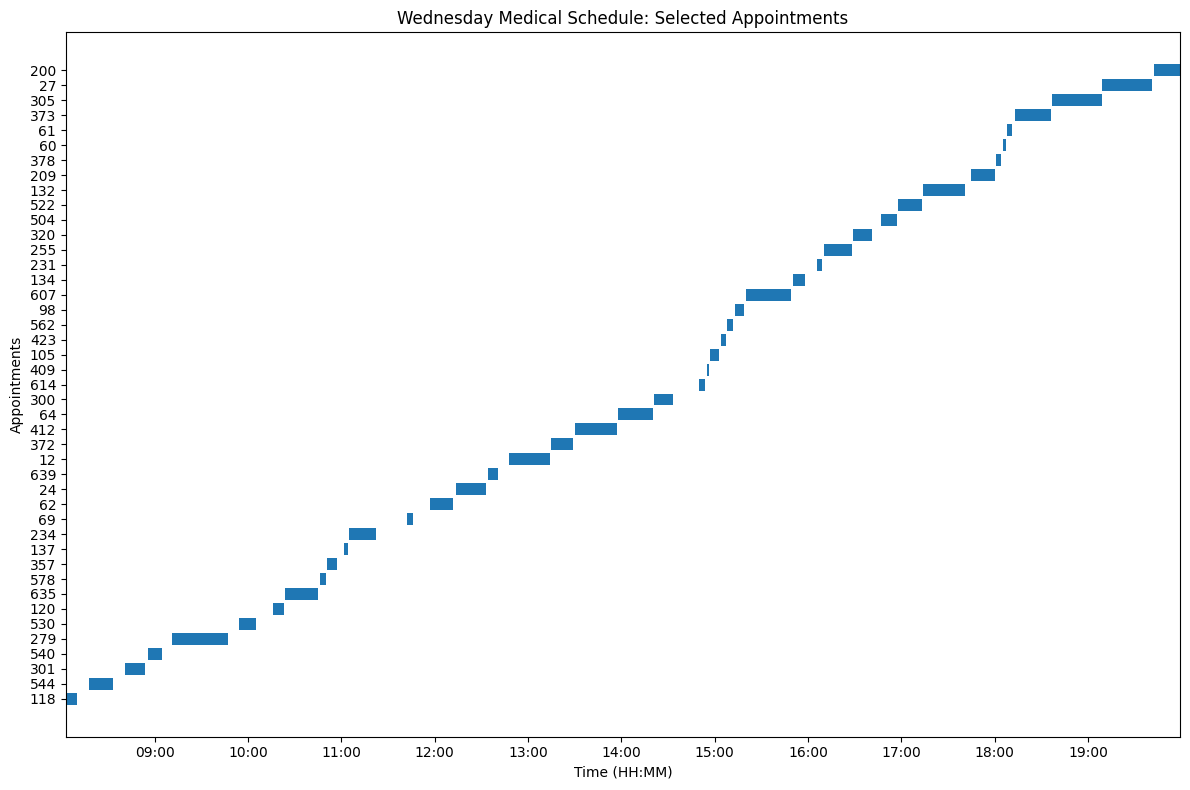

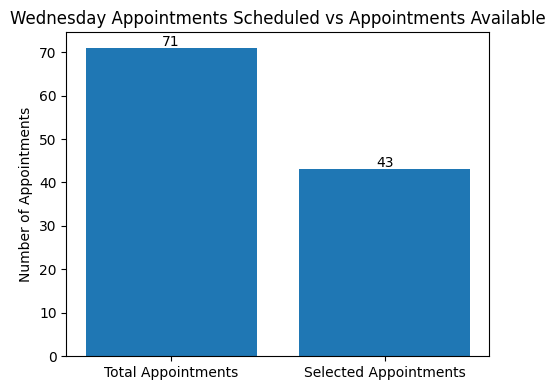

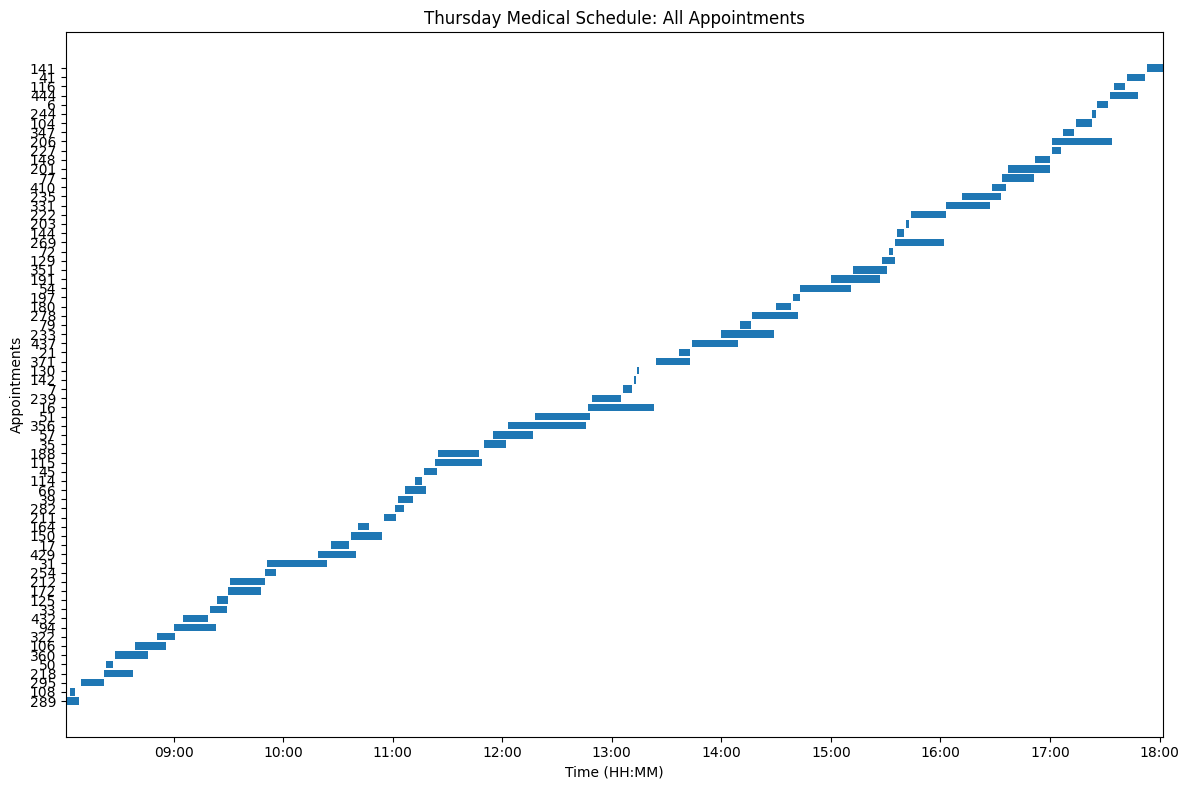

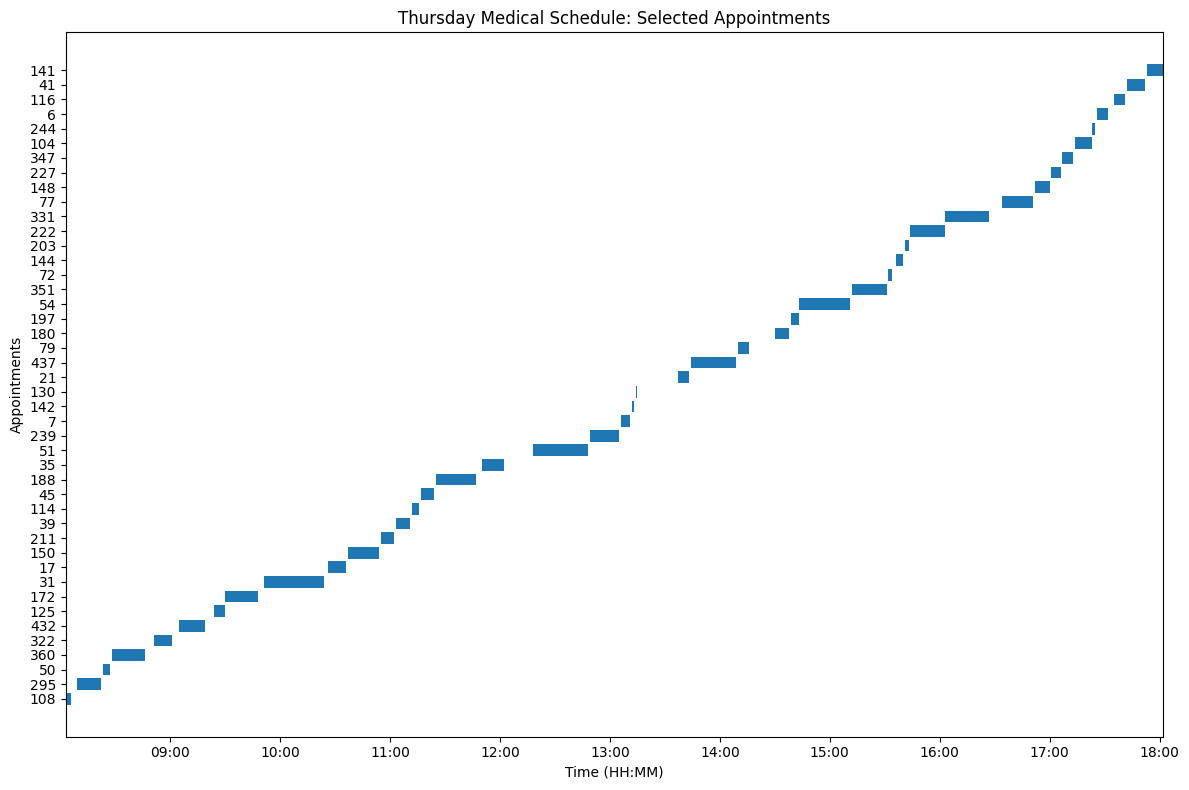

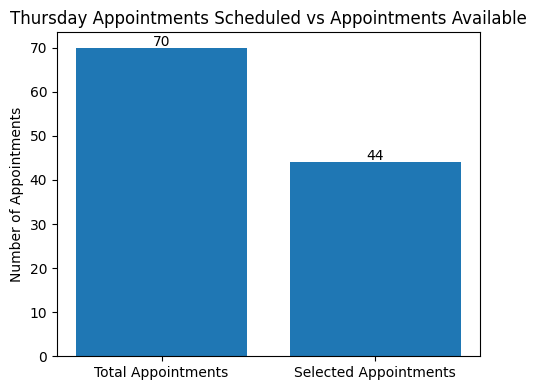

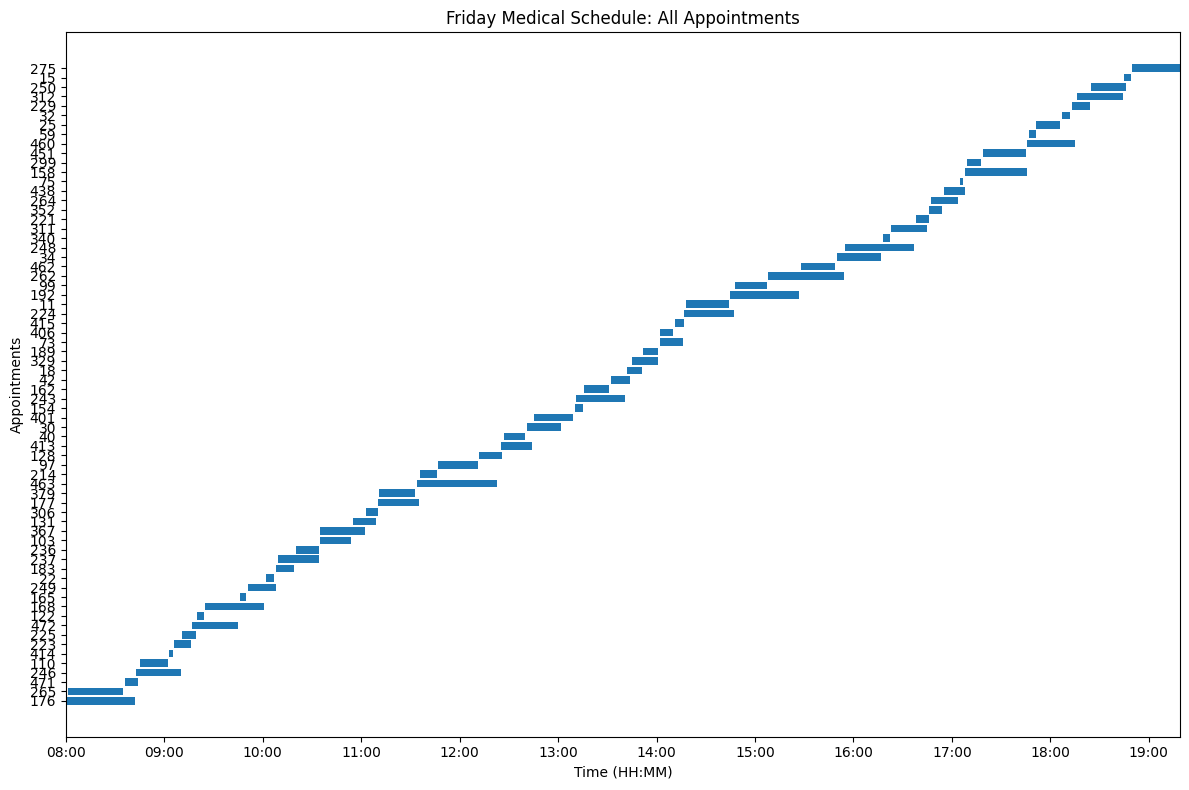

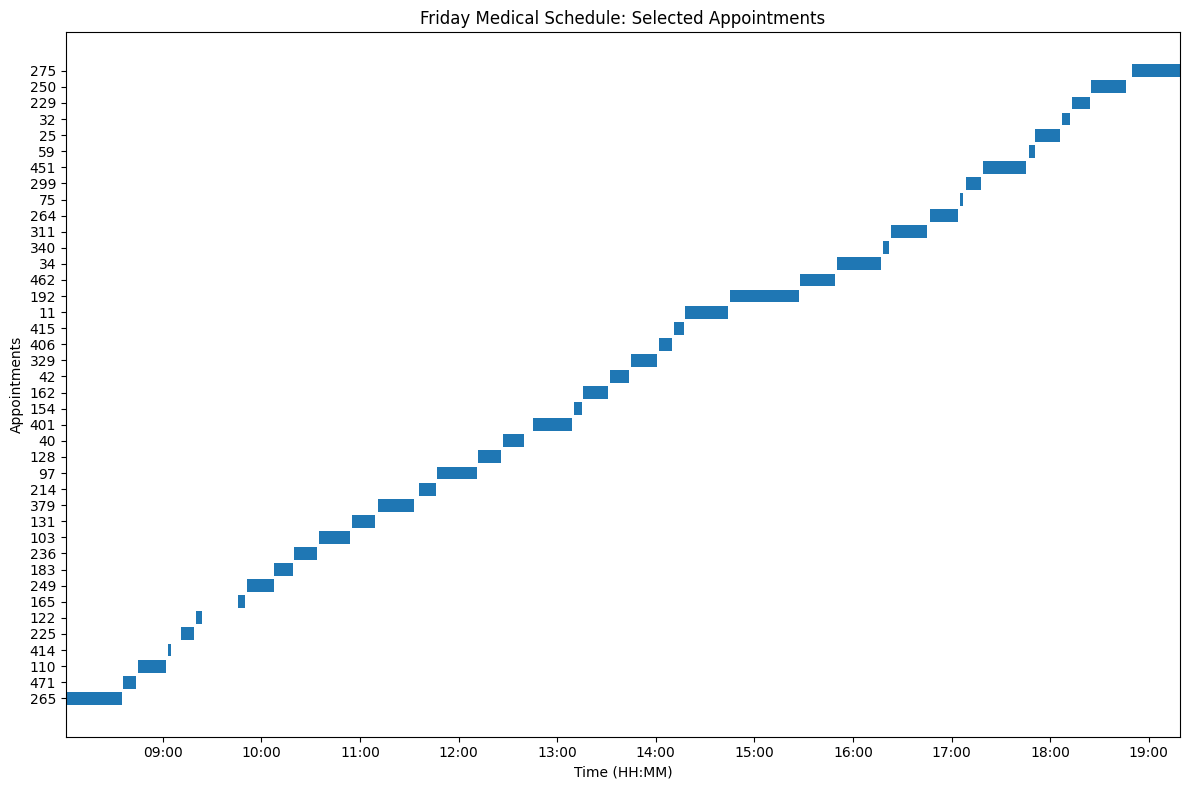

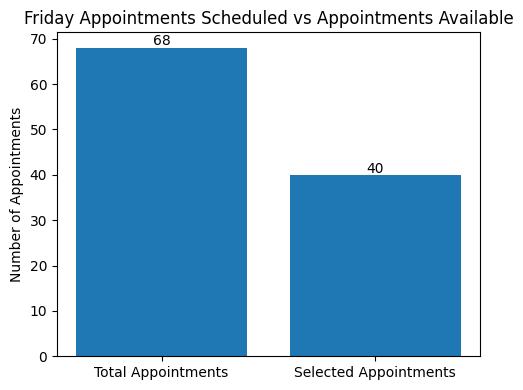

In [ ]:
# Run wis algorithm on datasets, create gantt timeline charts
time_elapsed = []
for day, df in dfs.items():
    # Convert dataframes to lists
    interval = df[interval_col].to_list()
    intervalNum = [i for i in range(len(interval))]
    start_time = df[start_time_col].to_list()
    end_time = df[end_time_col].to_list()
    start = df[start_min_col].to_list()
    finish = df[end_min_col].to_list()
    weight = df[priority_col].to_list()
    
    df[width_col] = df[end_min_col] - df[start_min_col]

    # Save the "Before" dataset
    before_df = df.copy()
    before_df = before_df.sort_values(start_min_col).reset_index(drop=True)

    before_df[width_col] = (
        before_df[end_min_col] - before_df[start_min_col]
    )

    # Define Gantt Chart data
    title = f"{day} Medical Schedule: All Appointments"
    x_label = "Time (HH:MM)"
    y_label = 'Appointments'

    # Create Gantt Chart (Before applying algorithm)
    fig = chart.create_gantt_chart(before_df, start_min_col, end_min_col, width_col, interval_col, title, x_label, y_label)
    fig.savefig(f"../results/medical-appointments/gantt-chart/before-algorithm/{day}_gantt.png")

    # Run algorithm
    start_timer = time.perf_counter()
    max_profit, selected_intervals = wis.create_interval_schedule(intervalNum, start, finish, weight)
    end_timer = time.perf_counter()
    runtime = (end_timer - start_timer) * 1000
    time_elapsed.append(runtime)

    selected_df = df.iloc[selected_intervals].copy()
    selected_df = selected_df.sort_values(start_min_col).reset_index(drop=True)

    # Duration in minutes
    selected_df[width_col] = selected_df[end_min_col] - selected_df[start_min_col]   

    # Save job schedule to csv files
    path = "../results/medical-appointments/schedule"
    os.makedirs(path, exist_ok=True)
    filename = f"{path}/{day}-schedule.csv"
    selected_df.to_csv(filename, index=False)

    # Define Gantt Chart data
    title = f"{day} Medical Schedule: Selected Appointments"
    x_label = "Time (HH:MM)"
    y_label = 'Appointments'

    # Create Gantt Chart (After applying algorithm)`
    fig = chart.create_gantt_chart(selected_df, start_min_col, end_min_col, width_col, interval_col, title, x_label, y_label)
    fig.savefig(f"../results/medical-appointments/gantt-chart/after-algorithm/{day}_gantt.png")

    # Define Bar Chart data
    title = f"{day} Appointments Scheduled vs Appointments Available"
    x_label_1 = "Total Appointments"
    x_label_2 = "Selected Appointments"
    y_label = "Number of Appointments"

    # Create bar chart: Jobs selected vs jobs available
    fig = chart.create_bar_chart(df, selected_df, title, x_label_1, x_label_2, y_label)
    plt.savefig(f"../results/medical-appointments/bar-chart/{day}_bar.png")

    # Record results
    selected = [interval[i] for i in selected_intervals]
    print(f"{day} Schedule:")
    print(f"Maximum Profit: {max_profit}")
    print(f"Selected Jobs: {selected}")
    print(f"Number of jobs selected: {len(selected)}")
    print(f"Number of jobs not selected: {len(df) - len(selected)}")
    print(f"Runtime: {runtime} milliseconds\n")

print(f"Total runtime for all schedules: {sum(time_elapsed)} milliseconds")


## Cloud Workload Datasset

In [10]:
# Import cloud data
dfs = {}
for day in days:
    filepath = cloud_path + day + ".csv"
    if Path(filepath).exists():
        df = pd.read_csv(filepath)
        dfs[day] = df

In [11]:
# Data frame columns
interval_col = 'job_interval'
start_time_col = 'start_time'
end_time_col = 'end_time'
start_min_col = 'start_minutes'
end_min_col = 'end_minutes'
width_col = "Duration"
priority_col = 'priority'

Monday Schedule:
Maximum Profit: 53
Selected Jobs: ['JOB_00197', 'JOB_01164', 'JOB_02169', 'JOB_00560', 'JOB_00328', 'JOB_01232', 'JOB_01056', 'JOB_02965', 'JOB_00454', 'JOB_03407', 'JOB_00656', 'JOB_00734', 'JOB_01732', 'JOB_03233', 'JOB_03255', 'JOB_02863', 'JOB_00252', 'JOB_01796', 'JOB_00422', 'JOB_01391', 'JOB_02813', 'JOB_00398', 'JOB_01358', 'JOB_03307', 'JOB_00466', 'JOB_00910']
Number of jobs selected: 26
Number of jobs not selected: 11
Runtime: 0.04508299997496579 milliseconds

Tuesday Schedule:
Maximum Profit: 53
Selected Jobs: ['JOB_02875', 'JOB_03259', 'JOB_00996', 'JOB_00859', 'JOB_01197', 'JOB_01459', 'JOB_00981', 'JOB_00315', 'JOB_03146', 'JOB_03254', 'JOB_02196', 'JOB_02160', 'JOB_02635', 'JOB_03260', 'JOB_03266', 'JOB_00927', 'JOB_02017', 'JOB_01824', 'JOB_02672', 'JOB_00791', 'JOB_00730', 'JOB_00805', 'JOB_01120', 'JOB_00246', 'JOB_01547']
Number of jobs selected: 25
Number of jobs not selected: 13
Runtime: 0.04549999999881038 milliseconds

Wednesday Schedule:
Maximu

/Users/Chris/Developer/GitHub/school/CSCI-274-Project/python/charts.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(5,4))


Sunday Schedule:
Maximum Profit: 82
Selected Jobs: ['JOB_01973', 'JOB_00114', 'JOB_03035', 'JOB_00258', 'JOB_02198', 'JOB_02181', 'JOB_00364', 'JOB_01904', 'JOB_01307', 'JOB_00798', 'JOB_00410', 'JOB_00855', 'JOB_03524', 'JOB_00527', 'JOB_01738', 'JOB_00571', 'JOB_00261', 'JOB_01070', 'JOB_01086', 'JOB_01819', 'JOB_00397', 'JOB_00641', 'JOB_02969', 'JOB_00403', 'JOB_02580', 'JOB_02409', 'JOB_01364', 'JOB_02359', 'JOB_02413', 'JOB_03230', 'JOB_01286', 'JOB_02297', 'JOB_01447', 'JOB_00308', 'JOB_00837', 'JOB_01861']
Number of jobs selected: 36
Number of jobs not selected: 23
Runtime: 0.0759580000249116 milliseconds

Total runtime for all schedules: 0.4137070000638232 milliseconds


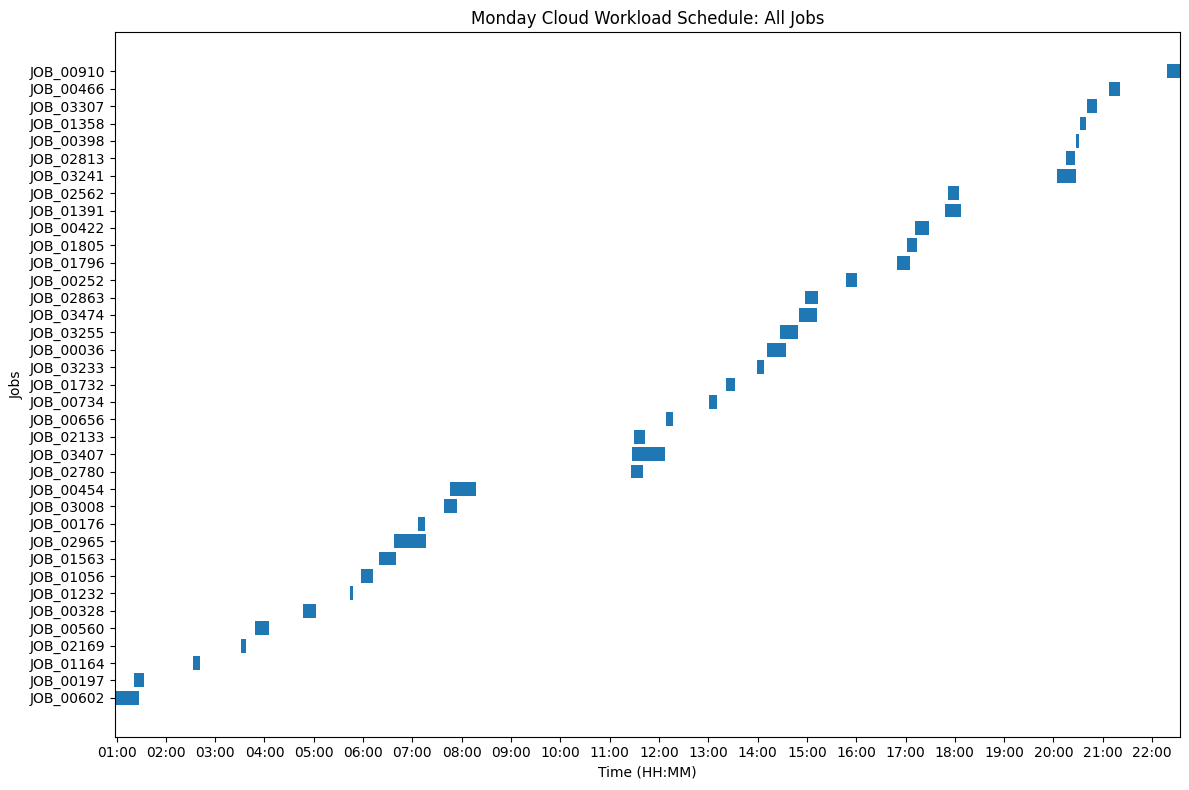

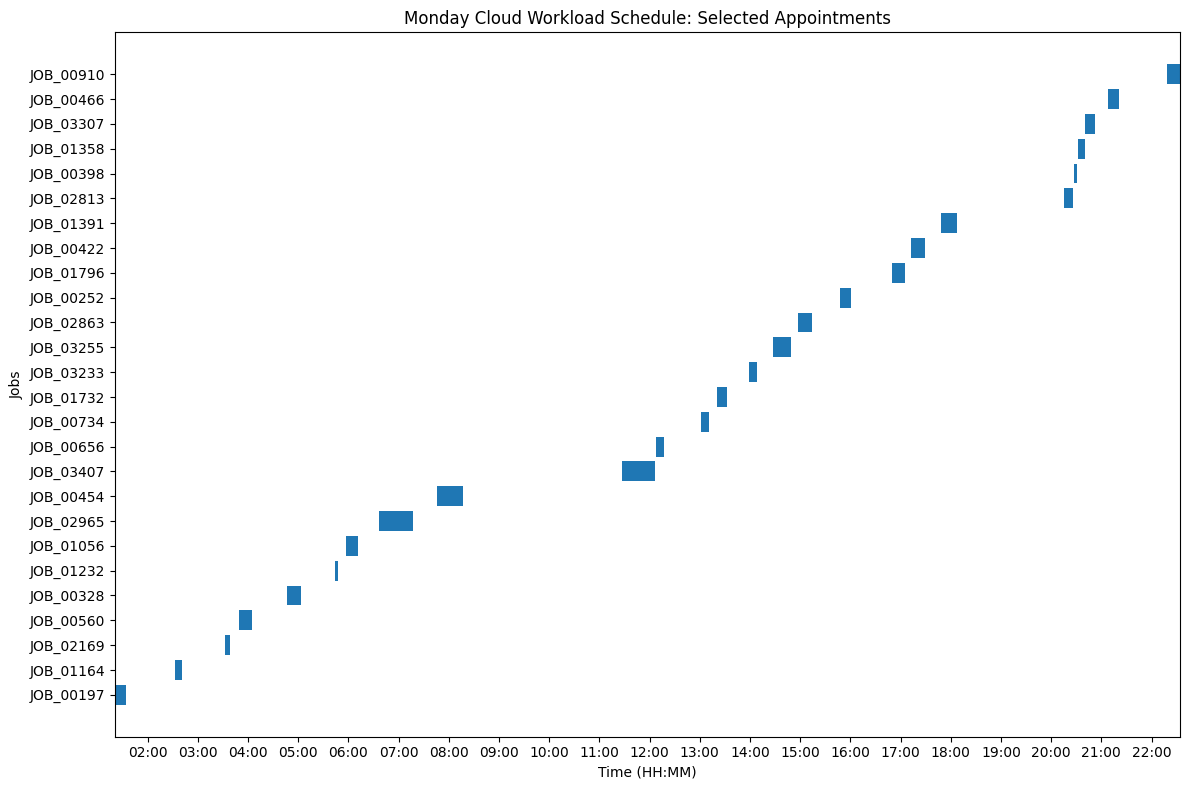

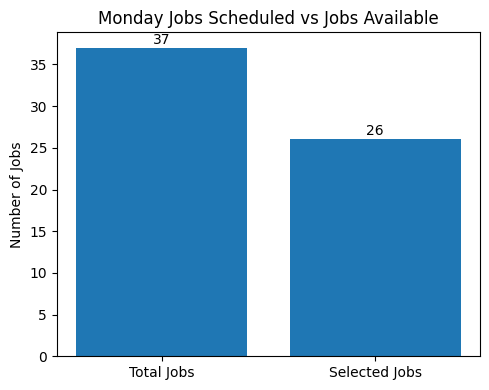

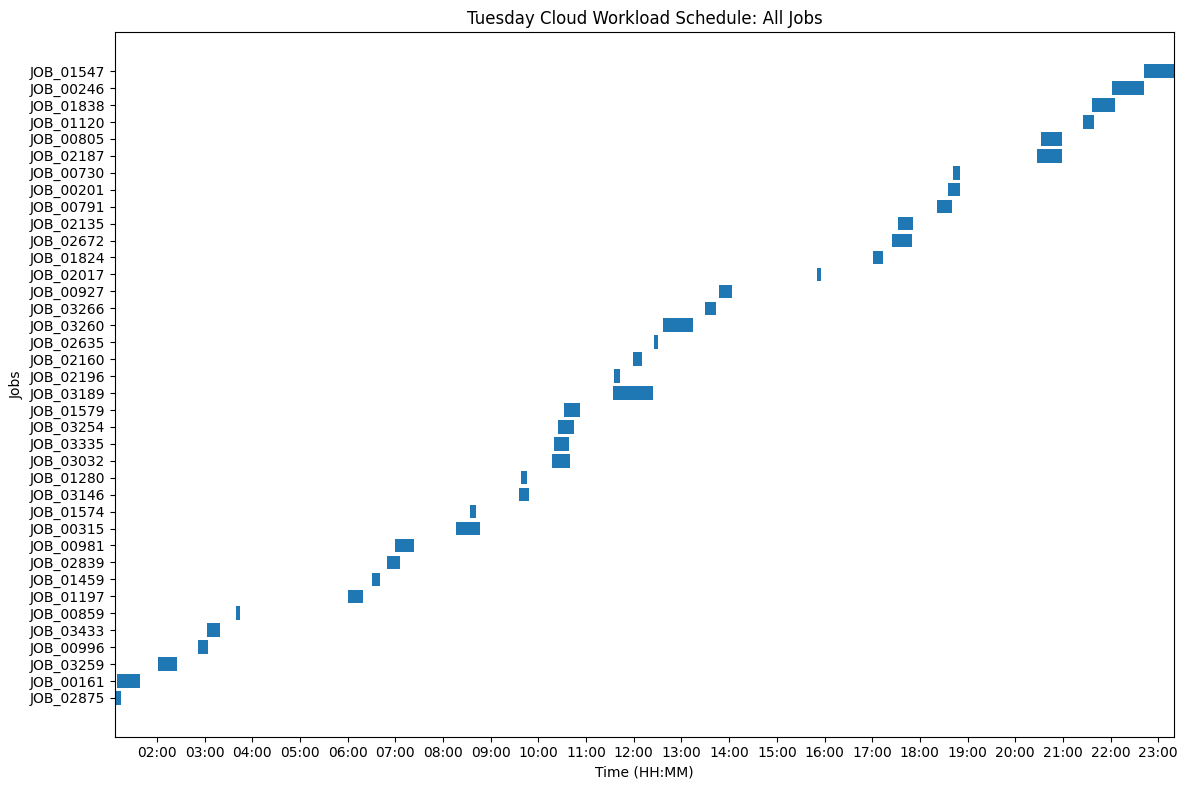

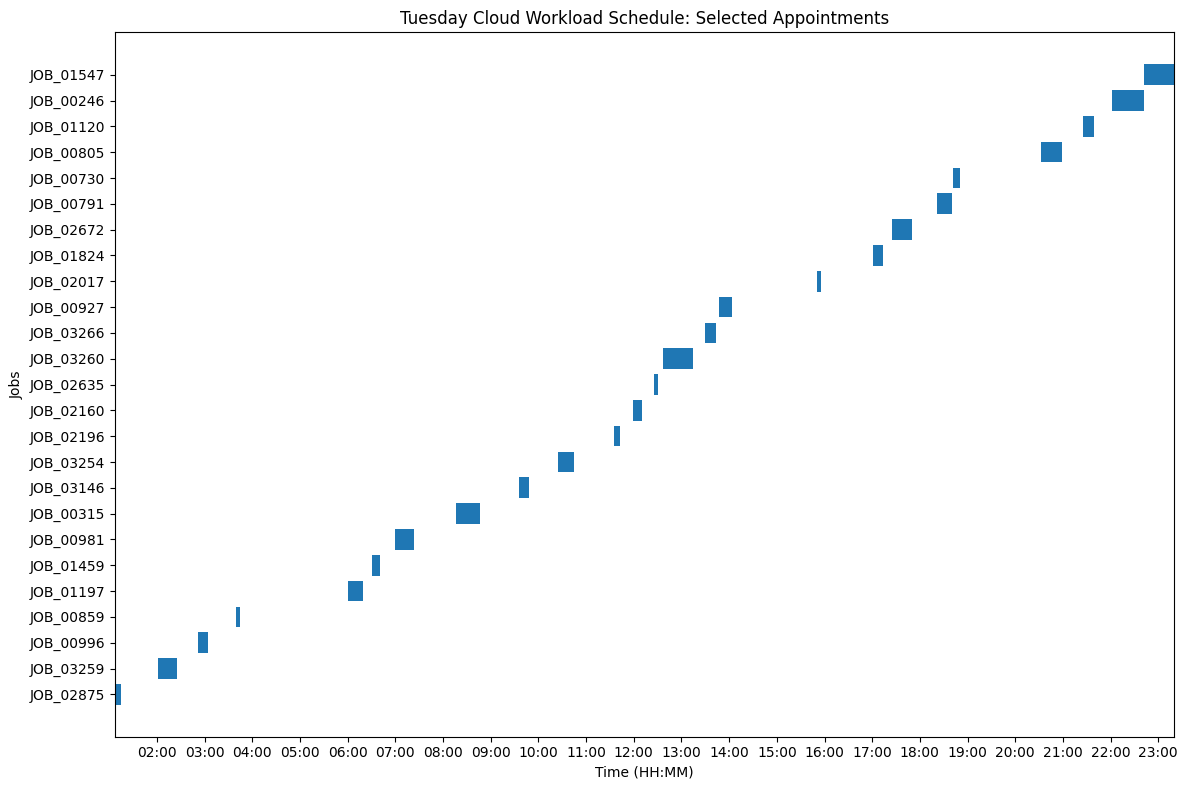

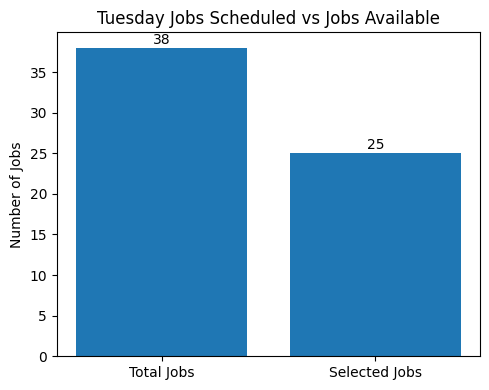

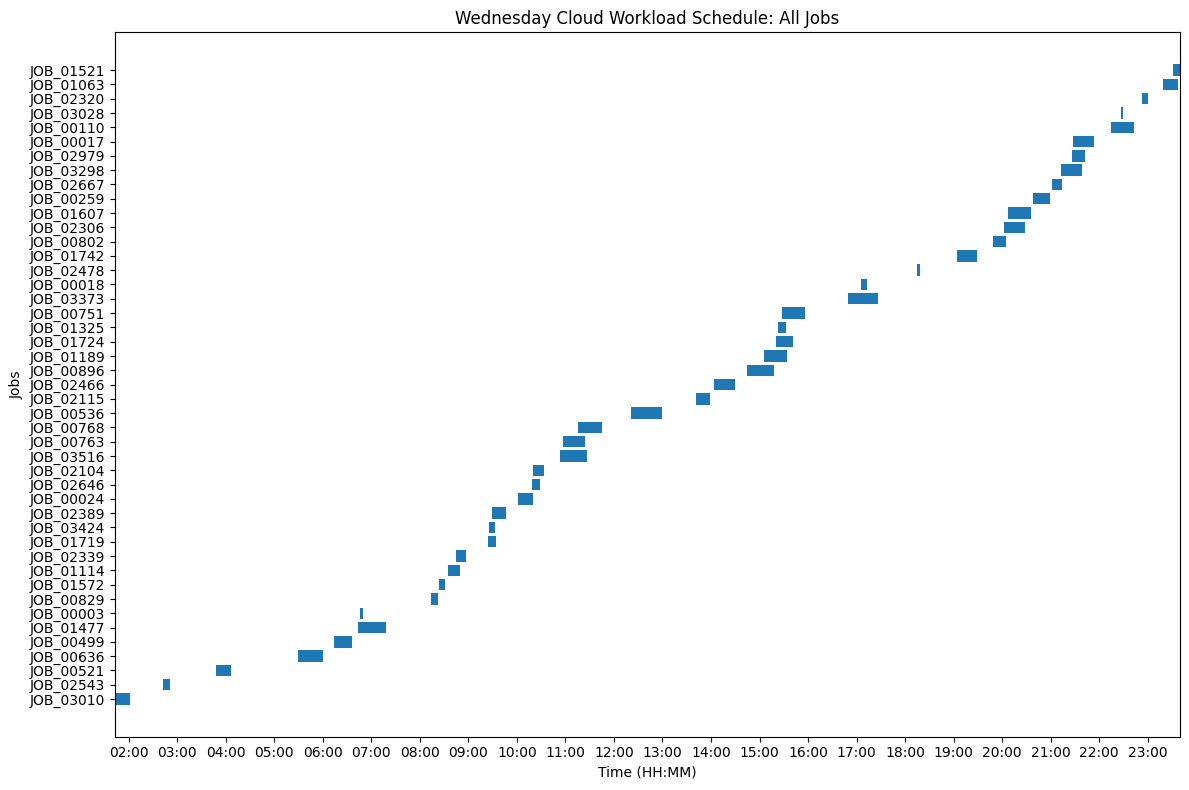

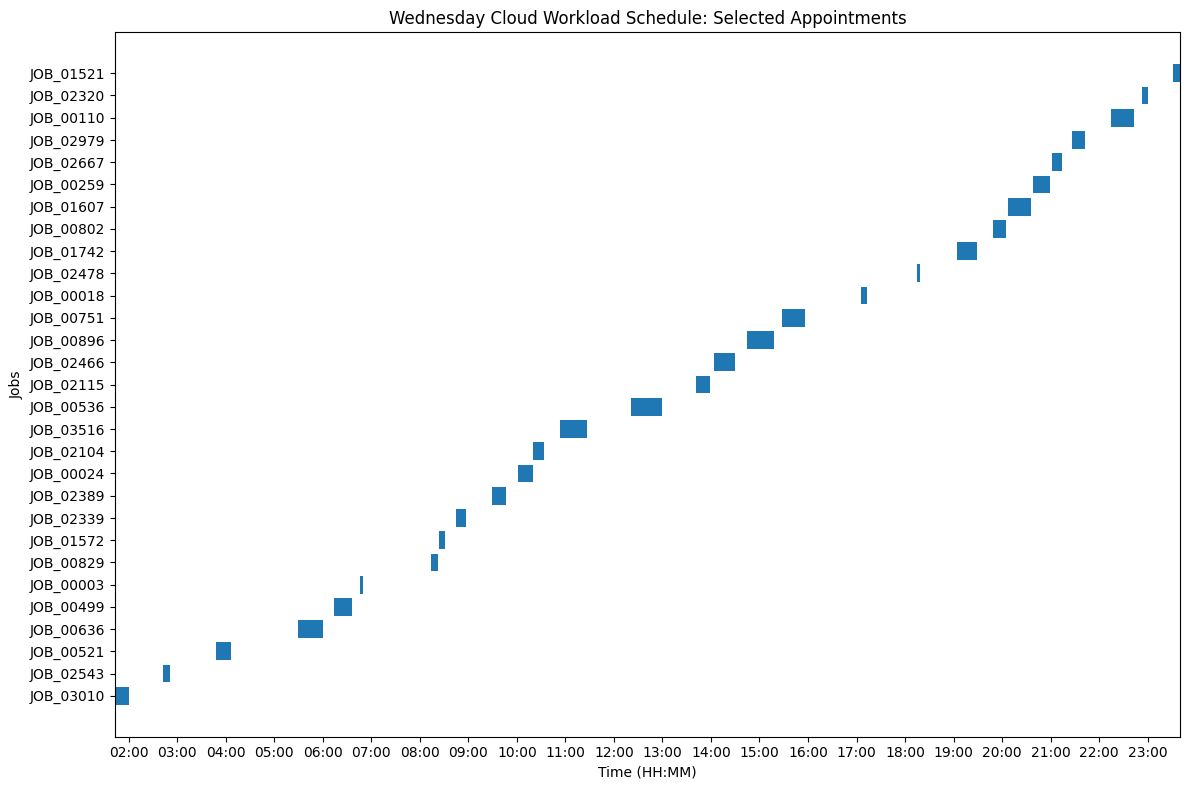

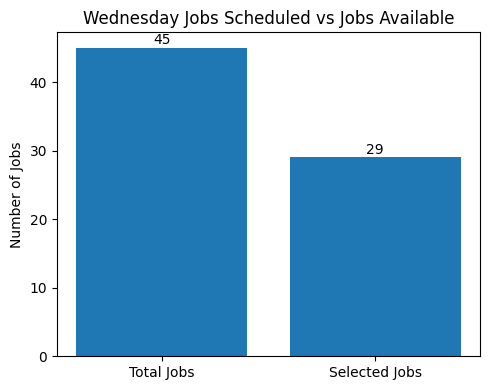

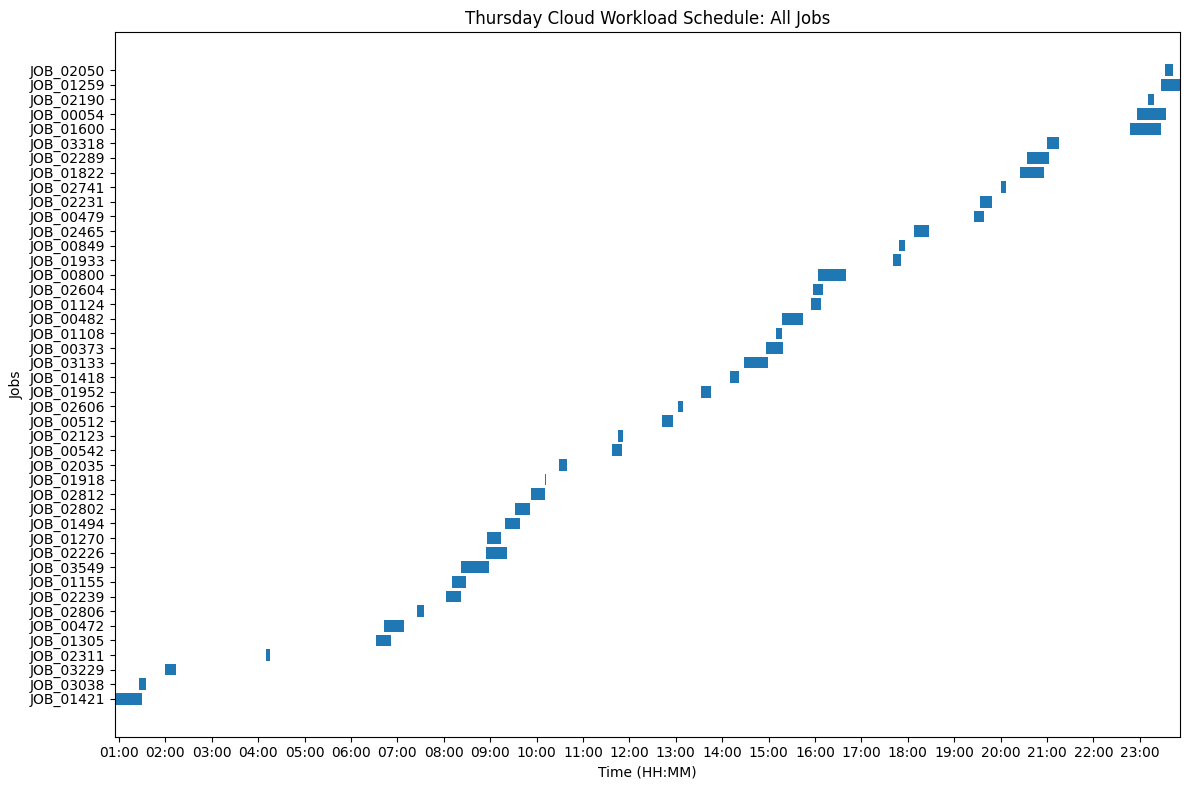

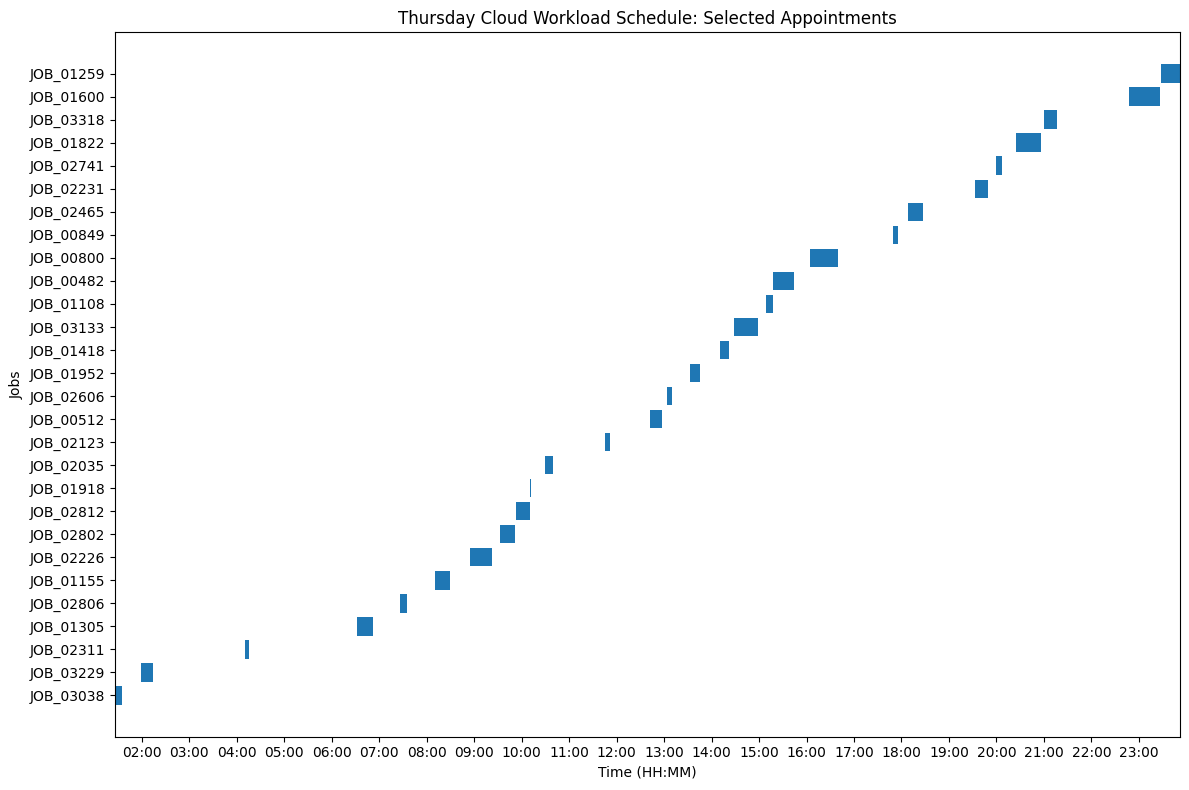

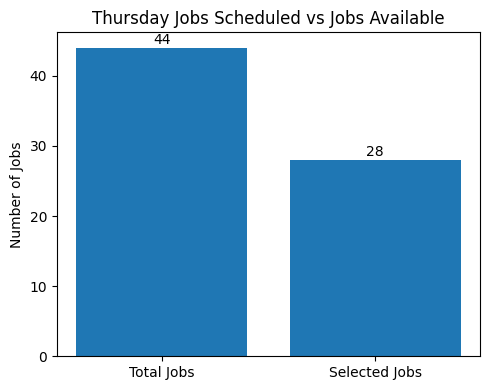

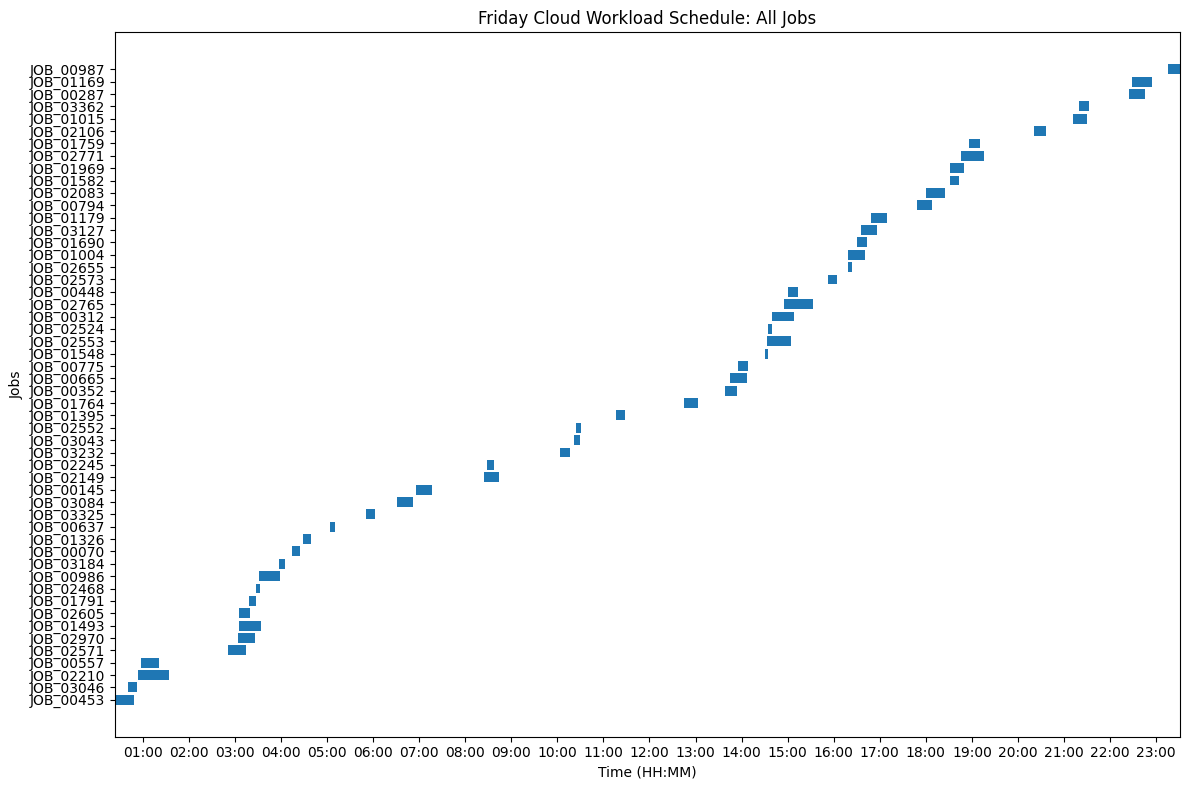

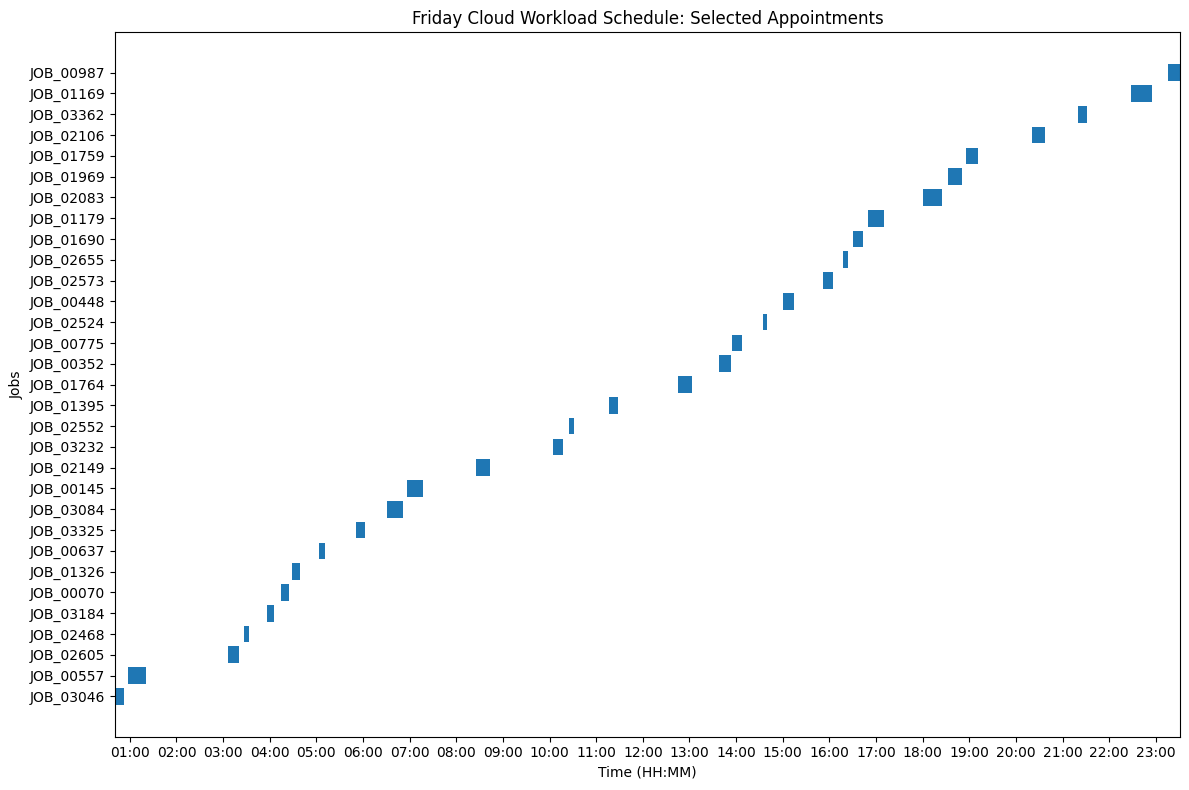

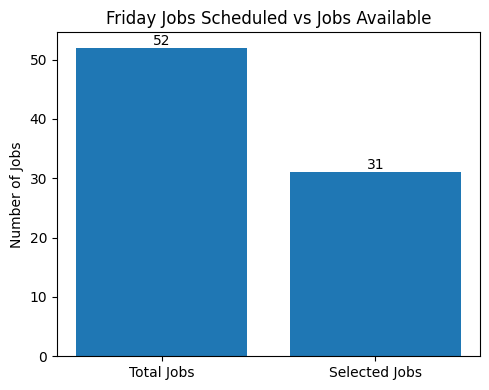

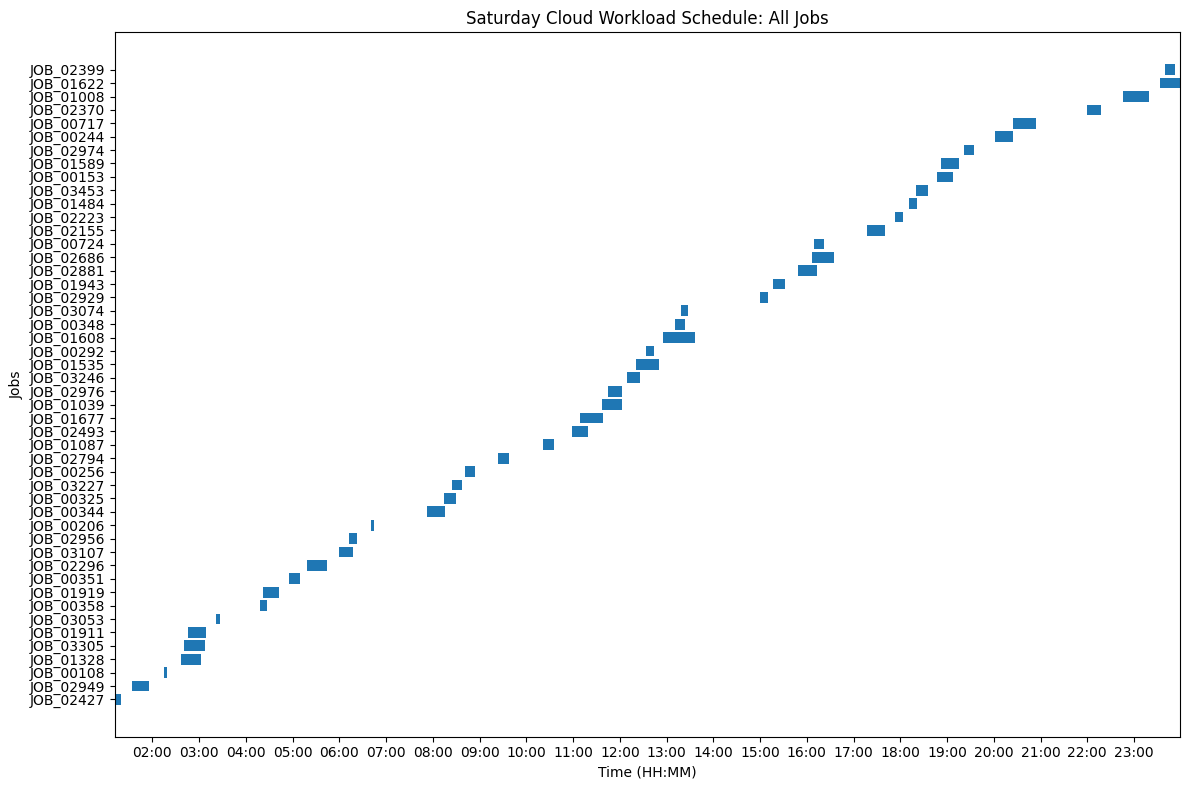

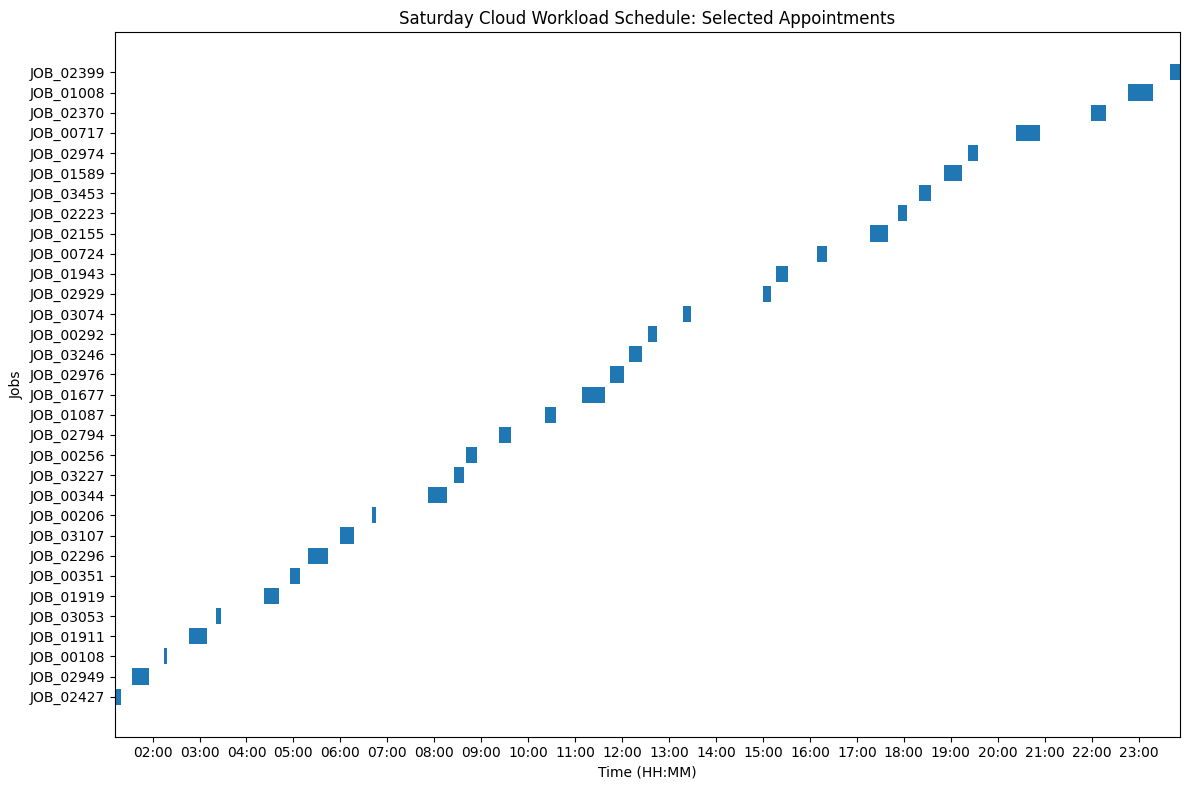

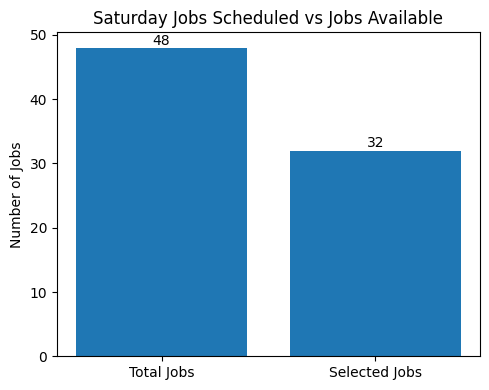

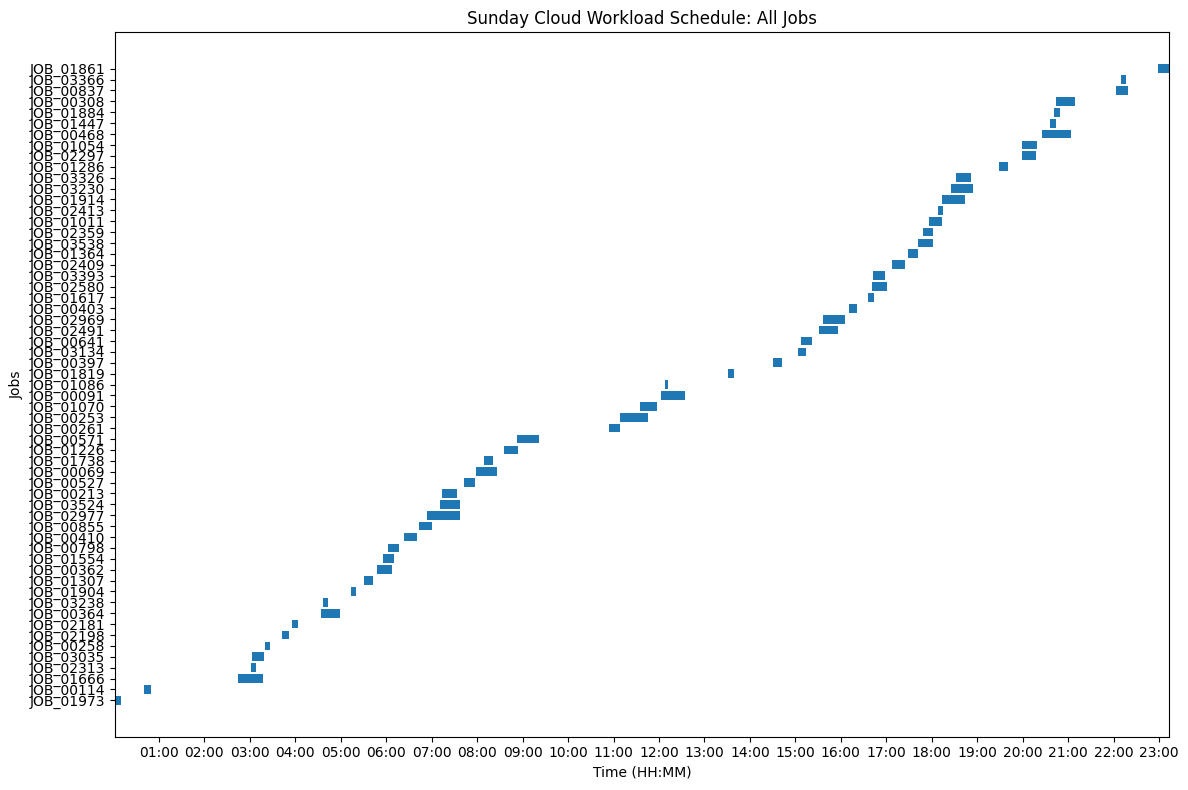

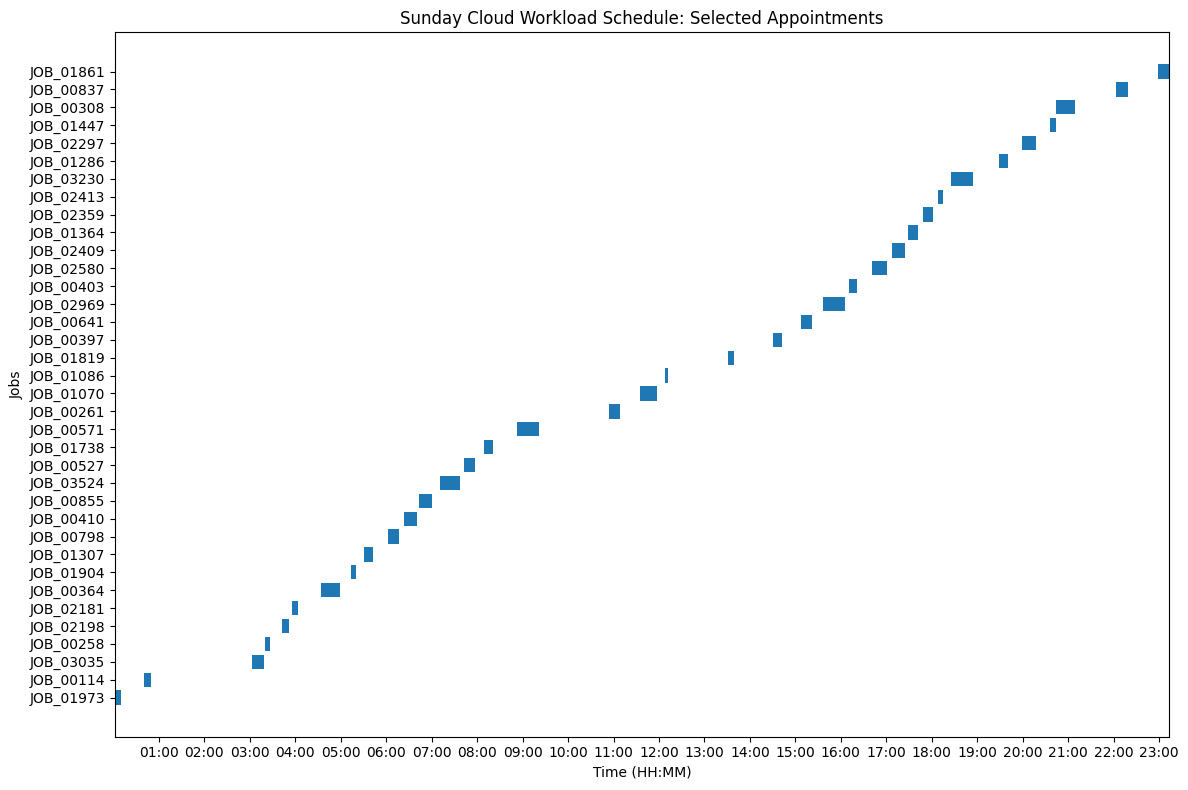

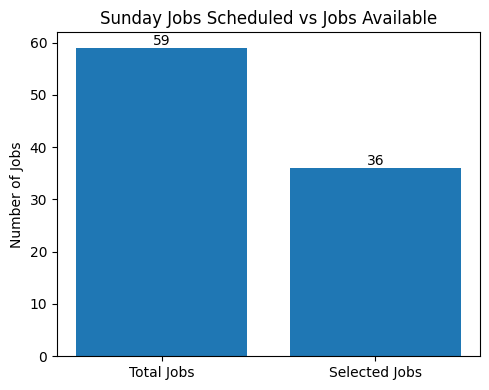

In [ ]:
# Run wis algorithm on datasets, create gantt timeline charts
time_elapsed = []
for day, df in dfs.items():
    # Convert dataframes to lists
    interval = df[interval_col].to_list()
    intervalNum = [i for i in range(len(interval))]
    start_time = df[start_time_col].to_list()
    end_time = df[end_time_col].to_list()
    start = df[start_min_col].to_list()
    finish = df[end_min_col].to_list()
    weight = df[priority_col].to_list()
    
    df['Duration'] = df[end_min_col] - df[start_min_col]

    # Save the "Before" dataset
    before_df = df.copy()
    before_df = before_df.sort_values(start_min_col).reset_index(drop=True)

    before_df[width_col] = (
        before_df[end_min_col] - before_df[start_min_col]
    )

    # Define Gantt Chart data
    title = f"{day} Cloud Workload Schedule: All Jobs"
    x_label = "Time (HH:MM)"
    y_label = 'Jobs'

    # Create Gantt Chart (Before applying algorithm)
    fig = chart.create_gantt_chart(before_df, start_min_col, end_min_col, width_col, interval_col, title, x_label, y_label)
    fig.savefig(f"../results/cloud-workload/gantt-chart/before-algorithm/{day}_gantt.png")

    # Run algorithm
    start_timer = time.perf_counter()
    max_profit, selected_intervals = wis.create_interval_schedule(intervalNum, start, finish, weight)
    end_timer = time.perf_counter()
    runtime = (end_timer - start_timer) * 1000
    time_elapsed.append(runtime)

    selected_df = df.iloc[selected_intervals].copy()
    selected_df = selected_df.sort_values(start_min_col).reset_index(drop=True)

    # Duration in minutes
    selected_df["Duration"] = selected_df[end_min_col] - selected_df[start_min_col]   

    # Save job schedule to csv files
    path = "../results/cloud-workload/schedule"
    os.makedirs(path, exist_ok=True)
    filename = f"{path}/{day}-schedule.csv"
    selected_df.to_csv(filename, index=False)

    # Define Gantt Chart data
    title = f"{day} Cloud Workload Schedule: Selected Appointments"
    x_label = "Time (HH:MM)"
    y_label = 'Jobs'

    # Create Gantt Chart (After applying algorithm)`
    fig = chart.create_gantt_chart(selected_df, start_min_col, end_min_col, width_col, interval_col, title, x_label, y_label)
    fig.savefig(f"../results/cloud-workload/gantt-chart/after-algorithm/{day}_gantt.png")

    # Define Bar Chart data
    title = f"{day} Jobs Scheduled vs Jobs Available"
    x_label_1 = "Total Jobs"
    x_label_2 = "Selected Jobs"
    y_label = "Number of Jobs"

    # Create bar chart: Jobs selected vs jobs available
    fig = chart.create_bar_chart(df, selected_df, title, x_label_1, x_label_2, y_label)
    plt.savefig(f"../results/cloud-workload/bar-chart/{day}_bar.png")

    # Record results
    selected = [interval[i] for i in selected_intervals]
    print(f"{day} Schedule:")
    print(f"Maximum Profit: {max_profit}")
    print(f"Selected Jobs: {selected}")
    print(f"Number of jobs selected: {len(selected)}")
    print(f"Number of jobs not selected: {len(df) - len(selected)}")
    print(f"Runtime: {runtime} milliseconds\n")

print(f"Total runtime for all schedules: {sum(time_elapsed)} milliseconds")